In [1]:
import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns
import os
from scipy import stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import savetxt

In [2]:
from Definicions import upperchanel
from Definicions import group_inf
from Definicions import mediumchanel
from Definicions import opteciogrups
from Definicions import find_nearest
from Definicions import grabt
from Definicions import epoch_return
from Definicions import calcul
from Import_all import Import_Patients #to create a list of the patiens with the EO-EC data and 12 chanels

In [6]:
#UPLOAD ALL THE FILES OF THE PATIENS IN A LIST LIKE THE FOLLOWING:
#Subject = EO_EC_Pacients[S] max=15
#EO = EO_EC_Pacients[S][0]
#EC = EO_EC_Pacients[S][1]
#Channel = EO_EC_Pacients[0][1][Num] max=12
basePATH = 'Files/Preprocessed/'
sorted_list_EO, sorted_list_EC, EO_EC_Pacients = Import_Patients(basePATH)
print(len(sorted_list_EO))

Reading Files/Preprocessed/sub-010002_EO.fdt
Reading 0 ... 117860  =      0.000 ...   471.440 secs...
Reading Files/Preprocessed/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...
Reading Files/Preprocessed/sub-010003_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Reading Files/Preprocessed/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...
Reading Files/Preprocessed/sub-010004_EO.fdt
Reading 0 ... 119748  =      0.000 ...   478.992 secs...
Reading Files/Preprocessed/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...
Reading Files/Preprocessed/sub-010005_EO.fdt
Reading 0 ... 119821  =      0.000 ...   479.284 secs...
Reading Files/Preprocessed/sub-010005_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Reading Files/Preprocessed/sub-010006_EO.fdt
Reading 0 ... 110270  =      0.000 ...   441.080 secs...
Reading Files/Preprocessed/sub-010006_EC.fdt
Reading 0 ... 116011  =      0.000 ..

In [13]:
import pickle

with open("EO_EC_Pacients_save.txt", "wb") as fp:   #Pickling
    pickle.dump(EO_EC_Pacients, fp)

with open("EO_EC_Pacients_save.txt", "rb") as fp:   # Unpickling
    EO_EC_Pacients_up = pickle.load(fp)



with open("sorted_list_ECsave.txt", "wb") as fp:   #Pickling
    pickle.dump(EO_EC_Pacients, fp)

with open("sorted_list_ECsave.txt", "rb") as fp:   # Unpickling
    sorted_list_EC_up = pickle.load(fp)



with open("sorted_list_EO_save.txt", "wb") as fp:   #Pickling
    pickle.dump(EO_EC_Pacients, fp)

with open("sorted_list_EO_save.txt", "rb") as fp:   # Unpickling
    sorted_list_EO_up = pickle.load(fp)

In [ ]:
from BandPower_Epoch_1c import BanPoer_Epoch
chanels_betta, chanels_gama, chanels_alpha, chanels_theta, chanels_delta = BanPoer_Epoch(EO_EC_Pacients, numchanel)

In [ ]:
#Import the data to analise
import csv

# open the file in universal line ending mode 
with open('Files/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  reader = csv.DictReader(infile)
  data = {}
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_well_being = data['TeiQueSF_well_being']

gama

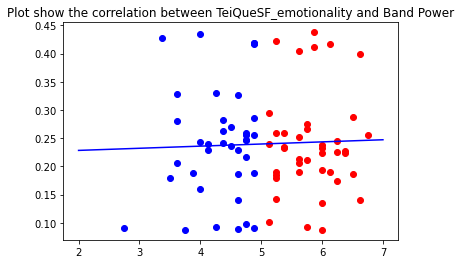

In [7]:
#correlation gama vs TeiQueSF_emotionality
all_info = []
x_corr = []
y_corr = []
for i in range(0, len(sorted_list_EC)):
    hename = sorted_list_EC[i]
    hename = str(hename[:-7])
    if hename in names:
        indices = [i for i, s in enumerate(names) if hename in s]
        x = (float(TeiQueSF_emotionality[int(indices[0])]))
        if float(x) < 5.0:
            x_corr.append(x)
            y = (float(pacient_beta_EC[i]))
            y_corr.append(y)
            plt.scatter(x,y, c='b')
        if float(x) >5.0:
            x_corr.append(x)
            y = (float(pacient_beta_EC[i]))
            y_corr.append(y)
            plt.scatter(x,y, c='r')


#LINE EC
z = np.poly1d(np.polyfit(x_corr, y_corr, 1))
y_len = np.array(len(y_corr))
xp = np.linspace(2, 7, y_len)
y = z(xp)
plt.plot(xp, y, c='b')


#PLOT ALL POINTS
plt.title('Plot show the correlation between TeiQueSF_emotionality and Band Power')
plt.show()

In [8]:
Pacient_beta_EO = []

pacient_alpha_EO = []

pacient_gama_EO = []

pacient_theta_EO = []

pacient_delta_EO = []

for pacient in EO_EC_Pacients:
    EO_Epochs = epoch_return(pacient[0])
    chanels_betta = []
    chanels_gama = []
    chanels_alpha = []
    chanels_theta = []
    chanels_delta = []
    for chane in EO_Epochs:
        for epoch in chane:
            f_beta = bandpower(epoch, 250,[30, 250], window_sec=5, relative=True)
            chanels_betta.append(f_beta)
            #gamma
            f_gama = bandpower(epoch, 250, [32, 100], window_sec=5, relative=True)
            chanels_gama.append(f_gama)
            #alpha
            f_alpha = bandpower(epoch, 250, [9, 13], window_sec=5, relative=True)
            chanels_alpha.append(f_alpha)
            #theta
            f_theta = bandpower(epoch, 250, [4, 8], window_sec=5, relative=True)
            chanels_theta.append(f_theta)
            #delta
            f_delta = bandpower(epoch, 250, [0.1, 4], window_sec=5, relative=True)
            chanels_delta.append(f_delta)
            
    #for chanels

    mean_x = statistics.median(chanels_betta)
    pacient_beta_EO.append(mean_x)

    mean_x = statistics.median(chanels_gama)
    pacient_alpha_EO.append(mean_x)

    mean_x = statistics.median(chanels_alpha)
    pacient_gama_EO.append(mean_x)

    mean_x = statistics.median(chanels_theta)
    pacient_theta_EO.append(mean_x)

    mean_x = statistics.median(chanels_delta)
    pacient_delta_EO.append(mean_x)




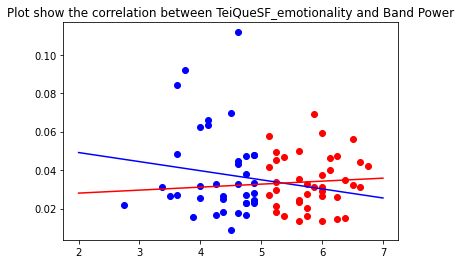

(-0.10823698080590792, 0.5177396212170721)
(0.05235348918141047, 0.7483368845700509)


In [15]:
#correlation gama vs TeiQueSF_emotionality
all_info = []
x_corr = []
x_corr_2 = []
y_corr_2 = []
y_corr = []
for i in range(0, len(sorted_list_EO)):
    hename = sorted_list_EO[i]
    hename = str(hename[:-7])
    if hename in names:
        indices = [i for i, s in enumerate(names) if hename in s]
        x = (float(TeiQueSF_emotionality[int(indices[0])]))
        if float(x) < 5.0:
            x_corr.append(x)
            y = (float(pacient_beta_EO[i]))
            y_corr.append(y)
            plt.scatter(x,y, c='b')
        if float(x) >5.0:
            x_corr_2.append(x)
            y = (float(pacient_beta_EO[i]))
            y_corr_2.append(y)
            plt.scatter(x,y, c='r')


#LINE EC
z = np.poly1d(np.polyfit(x_corr, y_corr, 1))
y_len = np.array(len(y_corr))
xp = np.linspace(2, 7, y_len)
y = z(xp)
plt.plot(xp, y, c='b')

z = np.poly1d(np.polyfit(x_corr_2, y_corr_2, 1))
y_len = np.array(len(y_corr))
xp = np.linspace(2, 7, y_len)
y = z(xp)
plt.plot(xp, y, c='r')


#PLOT ALL POINTS
plt.title('Plot show the correlation between TeiQueSF_emotionality and Band Power')
plt.show()
print(stats.pearsonr(x_corr, y_corr))
print(stats.pearsonr(x_corr_2, y_corr_2)) #

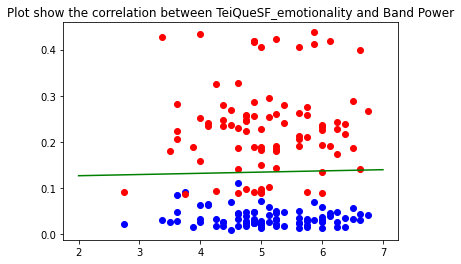

(0.018474330826490984, 0.8099098179244679)


In [10]:
from Definicions import calcul
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_emotionality, pacient_beta_EO, pacient_beta_EC, 2, 7)

(-0.10726849435766189, 0.32558249821596563)


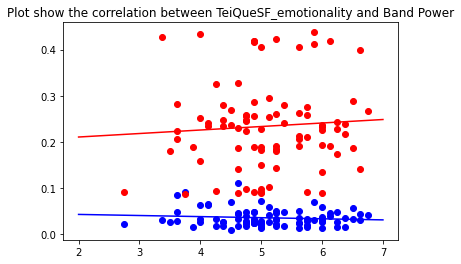

(0.06817823697961442, 0.5328026265487249)


In [23]:
  fr = [Pacient_beta_EO, pacient_alpha_EO, pacient_gama_EO, pacient_theta_EO = []
#for freq - all bands -all plots- (create table values).
#       emotional.                     x
#.  alfa gama betta...          alfa gama betta... 
#eo. 
#ec 


#bars plots
#standar errors of the mean <- 
#In our case the two blues would be the two groups of high low values, and the cond_A and cond_B etc would be the bands.


pacient_delta_EO = []]

    all_info = []
    x_corr = []
    y_corr = []
    x_corr_2 = []
    y_corr_2 = []
    for i in range(0, len(sorted_list_EO)):
        hename = sorted_list_EO[i]
        hename = str(hename[:-7])
        if hename in names:
            indices = [i for i, s in enumerate(names) if hename in s]
            x = (float(TeiQueSF_emotionality[int(indices[0])]))
            x_corr.append(x)
            y = (float(pacient_beta_EO[i]))
            y_corr.append(y)
            plt.scatter(x,y, c='b')

            indices = [i for i, s in enumerate(names) if hename in s]
            x = (float(TeiQueSF_emotionality[int(indices[0])]))
            x_corr_2.append(x)
            y = (float(pacient_beta_EC[i]))
            y_corr_2.append(y)
            plt.scatter(x,y, c='r')
            

    #LINE EC
    z = np.poly1d(np.polyfit(x_corr, y_corr, 1))
    y_len = np.array(len(y_corr))
    xp = np.linspace(2, 7, y_len)
    y = z(xp)
    plt.plot(xp, y, c='b')

    #LINE EC
    z = np.poly1d(np.polyfit(x_corr_2, y_corr_2, 1))
    y_len = np.array(len(y_corr_2))
    xp = np.linspace(2, 7, y_len)
    y = z(xp)
    plt.plot(xp, y, c='r')


    #PLOT ALL POINTS
    plt.title('Plot show the correlation between TeiQueSF_emotionality and Band Power')
    print(stats.pearsonr(x_corr, y_corr))

    #PLOT ALL POINTS
    plt.title('Plot show the correlation between TeiQueSF_emotionality and Band Power')
    plt.show()
    print(stats.pearsonr(x_corr_2, y_corr_2))

In [ ]:
#stadistical analisis scipy.stats.ranksums
#low vs high values 